## Modern Applied Optimization HW #1
#### Brian Wickman
#### Fall 2025

#### 3a. Convergence of ratio of consecutive fibonacci numbers to the golden ratio

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
[1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182]


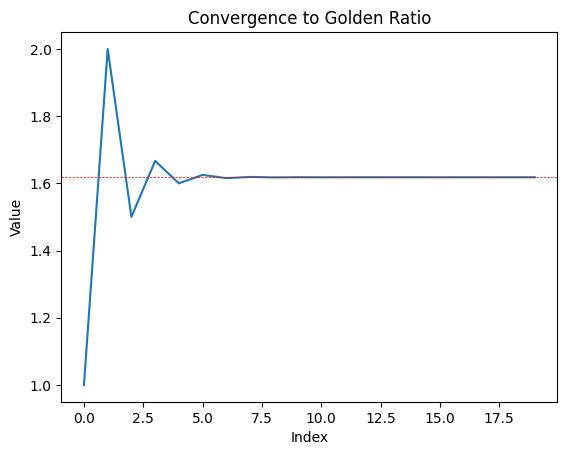

In [1]:
#problem set-up
import matplotlib.pyplot as plt
import math
x0, x1 = 0,1
fibonacci_seq = [x0, x1] + [None] * 100
ratio_fib_seq = [None] * 100

# Calculate sequences
for x in range(2, len(fibonacci_seq)):
    fibonacci_seq[x] = fibonacci_seq[x-2] + fibonacci_seq[x-1]
    ratio_fib_seq[x-2] = fibonacci_seq[x] / fibonacci_seq[x-1]
    
print(fibonacci_seq[:10])
print(ratio_fib_seq[:10])

# plot ratios as a function of index
golden_ratio_flt = (1+math.sqrt(5))/2
plt.plot(range(len(ratio_fib_seq[:20])), ratio_fib_seq[:20])  # x: indices, y: values
plt.xlabel('Index')
plt.ylabel('Value')
plt.axhline(y=golden_ratio_flt, color='r', linestyle='--', linewidth=0.5)  # Horizontal line at y=2
plt.title('Convergence to Golden Ratio'); plt.show()

[0.6180339887498949, 0.3819660112501051, 0.1180339887498949, 0.04863267791677184, 0.018033988749894814, 0.0069660112501050975, 0.0026493733652794837, 0.0010136302977241662, 0.00038692992636546464, 0.00014782943192326314]


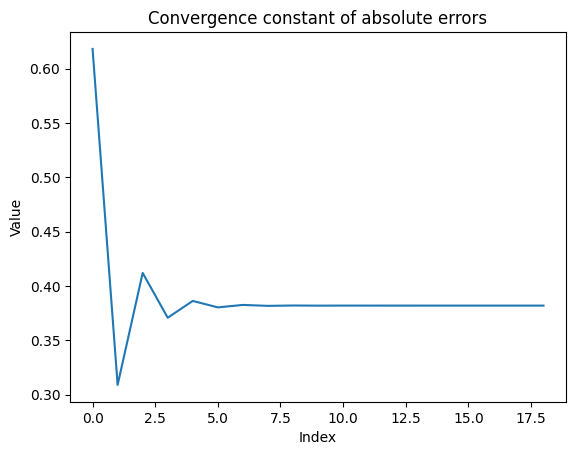

In [2]:
# What type of convergence?
# create sequence of absolute errors, then compare
abs_errors = [None] * 20
ratio_abs_errors = [None] * 19 # converge to 0, 1, or a constant?
for x in range(len(abs_errors)):
    abs_errors[x] = abs(ratio_fib_seq[x] - golden_ratio_flt)
    if x > 0:
        ratio_abs_errors[x-1] = abs_errors[x] / abs_errors[x-1]
print(abs_errors[:10])

# plot ratio of errors to find c
plt.plot(range(len(ratio_abs_errors[:20])), ratio_abs_errors[:20])  # x: indices, y: values
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Convergence constant of absolute errors'); plt.show()

### 3b. Division optimization without division

Consider Newton's method with $f(x) = \frac{1}{x}-a \quad \implies \quad x_{k+1} = 2x_k -ax_k^2$. When does this method converge?

Find the root of 0.08333333333333333 with initial guess 1; correct answer is 12.0


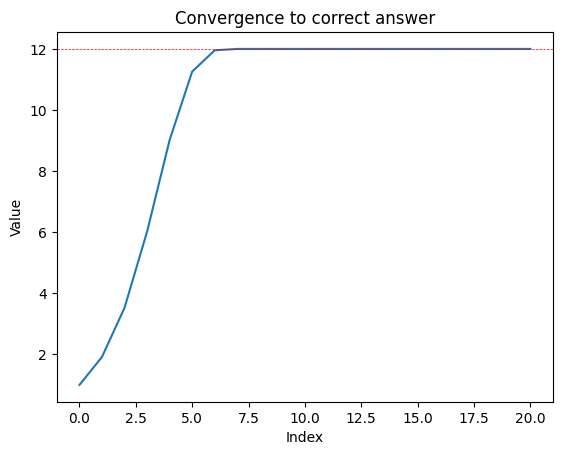

In [3]:
# Newton's root finding algorithm for 1/a
init_guess, num = (1, 1/12)
print(f'Find the root of {num} with initial guess {init_guess}; correct answer is {1/num}')

# Implement algorithm
newtons_algo = [init_guess] + [None] * 20
for x in range(len(newtons_algo) - 1):
    newtons_algo[x+1] = newtons_algo[x] * (2- num * newtons_algo[x])
    
threshold = 1e-10
if abs(newtons_algo[-1] - (1/num)) > threshold:
    print(f'Algorithm failed to converge (best guess: {newtons_algo[-1]})')

# graph result
plt.plot(range(len(newtons_algo)), newtons_algo)  # x: indices, y: values
plt.xlabel('Index'); plt.ylabel('Value')
plt.axhline(y=(1/num), color='r', linestyle='--', linewidth=0.5)  # Horizontal line at correct answer
plt.title('Convergence to correct answer'); plt.show()

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


C:\Users\bwick\AppData\Local\Temp\ipykernel_15248\3837904503.py:6: RuntimeWarning: overflow encountered in scalar multiply
  newtons_algo_seq[x+1] = newtons_algo_seq[x] * (2- value * newtons_algo_seq[x])


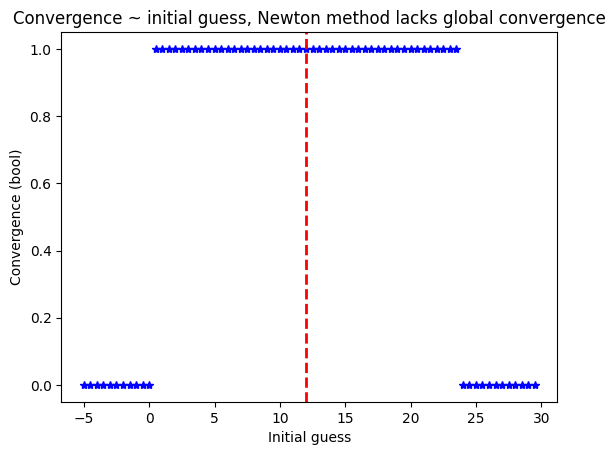

In [4]:
# function to find reciprocal of 'value' given an initual guess and threshold (error tolerance)
# returns bool: true for convergence, false otherwise 
def newtons_algo(value, init_guess, threshold = 1e-10):
    newtons_algo_seq = [init_guess] + [None] * 20
    for x in range(len(newtons_algo_seq) - 1):
        newtons_algo_seq[x+1] = newtons_algo_seq[x] * (2- value * newtons_algo_seq[x])
        
    if abs(newtons_algo_seq[-1] - (1/value)) < threshold:
        return True #(True, newtons_algo_seq[-1].round(4))
    else: 
        return False #(False, newtons_algo_seq[-1])
    
# Test range of initial guesses from 0.1 to 0, steps of 0.05
# for which values is converge achieved?
import numpy as np
init_guess_seq = np.arange(0.1, 1.05, 0.05)
convergence_test = [newtons_algo(value = 1/12, init_guess = init_guess_val, threshold = 1e-10) for init_guess_val in init_guess_seq]
print(convergence_test)

# Test for broader range of initial guesses from 0.1 to 0, steps of 0.05
# for which values is converge achieved?
import numpy as np
init_guess_seq = np.arange(-5, 30, 0.5)
convergence_test = [newtons_algo(value = 1/12, init_guess = init_guess_val, threshold = 1e-10) for init_guess_val in init_guess_seq]
#print(convergence_test)

# Plot convergence
plt.plot(init_guess_seq, convergence_test, "*", color = 'b')
plt.xlabel('Initial guess'); plt.ylabel('Convergence (bool)')
plt.title('Convergence ~ initial guess, Newton method lacks global convergence')
plt.axvline(x=12, color='r', linestyle='--', linewidth=2)  # Hline at correct answer
plt.show()

### 3c. Find largest root of $2x = 3 sin x$ to three decimal places

Again, apply Newton algorithm where $x_{k+1} = x_k - \frac{3 sin(x) - 2x}{3cos(x) -2}$. We know the largest root is on the interval $[0,1.5]$, so start initial guess at upper end of this range.

In [5]:
# newton's algo for 3b
def newtons_algo2(initial_guess):
    newtons_algo_seq = [initial_guess] + [None] * 20
    for x in range(len(newtons_algo_seq) - 1):
        newtons_algo_seq[x+1] = newtons_algo_seq[x] - (3 * math.sin(newtons_algo_seq[x]) - 2 * newtons_algo_seq[x])/ (3 * math.cos(newtons_algo_seq[x]) -2)
    return newtons_algo_seq

# test function
# largest root
larg_root = newtons_algo2(1.5)[-1]
print(f'{larg_root}')

# other roots
print(newtons_algo2(0.5)[-1])
print(newtons_algo2(-0.5)[-1])
print(newtons_algo2(-1)[-1])
print(newtons_algo2(-4)[-1])

1.4957815682220996
0.0
0.0
-1.4957815682220996
-1.4957815682220996


### 4. Implementation of bisection algorithm

4a. Analytical solution for global minimizer for $f(x) = x \sin(4x)$ on the interval $[0,3]$. Note (on the specified interval) $f'(x) = 4x\cos (4x) + \sin (4x) = 4x + tan(4x) = 0$ has roots at the following points [0, 0.507, 1.228, 1.995, 2.771]. Plugging them back into original function, conclude that $2.771 \in [\frac{7}{8}\pi, 3]$ is the global minimum.

In [6]:
# 4a)
def f_prime(x):
    return 4 * x * math.cos(4 * x) + math.sin(4 * x)
derivative_roots = [0, 0.507, 1.228, 1.995, 2.771]
# lowest value at 2.771
print([f_prime(val) for val in derivative_roots])

# Define decorator that counts the number of function evaluations
# Apply to interval calculations to track # of loops
def count_evaluations(func):
    def wrapper(*args, **kwargs):
        wrapper.count += 1
        return func(*args, **kwargs)
    wrapper.count = 0
    return wrapper

[0.0, 0.002048638631390154, -0.006152688506491755, -0.010896821629700404, -0.017259162438365228]


#### Now, I implement Algorithm A as a variant of the bisection algorithm.

In [7]:
# Function inputs (function, interval, threshold)
# function f defined above
init_interval = (0,3)
threshold_int_length = 0.02
def f(x):
    return x * math.sin(4 * x)

@count_evaluations
def find_intervals(a, b, divisions):
    return [a + int_num * (b-a)/divisions for int_num in range(divisions + 1)]
#print(find_intervals(0,3,4)[1:-1]) # gives interior points

def algorithm_a(func, interval, threshold):
    # reset the find_intervals counter
    find_intervals.count = 0
    
    # While loop information
    current_interval = interval
    interval_endpoints = None
    interior_point_min_index = None
    while (current_interval[1] - current_interval[0]) > threshold:      
        # identify intervals
        interval_endpoints = find_intervals(current_interval[0],current_interval[1],4)
        interval_interior_pts = interval_endpoints[1:-1]
        
        # troubleshooting misguided intervals
        #print(interval_interior_pts)
        
        # evaluate function at interval interiors
        func_output = [func(x) for x in interval_interior_pts]
        
        # find minimum func_output, update current interval to be centered around min f(x)
        interior_point_min_index = np.argmin(func_output)
        current_interval = [interval_endpoints[interior_point_min_index], interval_endpoints[interior_point_min_index+2]]

    return interval_endpoints[interior_point_min_index + 1]
        
# Confirm test case
minimizer_002 = algorithm_a(func = f, interval = [0,3], threshold = 0.02)
print(f'Threshold = 0.02: local minimizer = {minimizer_002}, local minimum = {f(minimizer_002)}')
print(f'Number of function calls: {find_intervals.count}') 

# Apply to lower threshold
minimizer_001 = algorithm_a(func = f, interval = [0,3], threshold = 0.01)
print(f'Threshold = 0.01: local minimizer = {minimizer_001}, local minimum = {f(minimizer_001)}')
print(f'Number of function calls: {find_intervals.count}') 

Threshold = 0.02: local minimizer = 1.23046875, local minimum = -1.2035681558490536
Number of function calls: 8
Threshold = 0.01: local minimizer = 1.2275390625, local minimum = -1.2036115146992672
Number of function calls: 9


#### Now, I implement Algorithm B.

In [8]:
# if x1 < x2, then d2 = x1 and x3 = x2 - d2
@count_evaluations
def find_intervals_b(a, b, r = (2/(1+math.sqrt(5)))):
    interval_length = r * (b - a) # constant r
    return sorted([a, b - interval_length, a + interval_length, b]) # imposes ordering

print(find_intervals_b(0,3)) 
print(find_intervals_b(0,1.854101))
print(find_intervals_b(0,0.708204))

[0, 1.1458980337503157, 1.8541019662496843, 3]
[0, 0.7082035634248314, 1.1458974365751686, 1.854101]
[0, 0.2705098570313695, 0.43769414296863046, 0.708204]


In [9]:
def algorithm_b(func, interval, threshold):
    # reset the find_intervals counter
    find_intervals_b.count = 0
    
    # While loop information
    current_interval = interval
    interval_endpoints = None
    interior_point_min_index = None
    while (current_interval[1] - current_interval[0]) > threshold:
        # identify intervals,
        interval_endpoints = find_intervals_b(current_interval[0], current_interval[1])
        interval_interior_pts = interval_endpoints[1:-1]

        # evaluate function at interval interiors
        func_output = [func(x) for x in interval_interior_pts]

        # troubleshoot misguided intervals
        # print(f'Interior points: {[round(x, 3) for x in interval_endpoints]}, f(int pts): {func_output}')

        # find minimum func_output, update current interval to be centered around min f(x)
        interior_point_min_index = np.argmin(func_output)
        current_interval = [interval_endpoints[interior_point_min_index],
                            interval_endpoints[interior_point_min_index + 2]]

    return interval_endpoints[interior_point_min_index + 1]

# Use on test case
minimizer_001_b = algorithm_b(func=f, interval=[0, 3], threshold=0.01)
print(f'Algorithm A (0.01): local minimizer = {minimizer_001}, local minimum = {f(minimizer_001)}')
print(f'Algorithm B (0.01): local minimizer = {minimizer_001_b}, local minimum = {f(minimizer_001_b)}')

print(f'Number of function calls: {find_intervals_b.count}') 

Algorithm A (0.01): local minimizer = 1.2275390625, local minimum = -1.2036115146992672
Algorithm B (0.01): local minimizer = 1.2283904625977908, local minimum = -1.2036173776222927
Number of function calls: 12


### 4c. Now for algorithm C
 As $n \to \infty$, Algorithms B and C converge as $lim_{n \to \infty} r_n = lim_{n \to \infty}\frac{1}{\phi_n} = \frac{1}{\phi}$. As the sequence $\phi_k$ converges to $\phi$, the interval at every step is reduced by the same amount.

In [10]:
# function to calc kth term of fibonacci sequence and consecutive ratio
x0, x1 = 0,1
fibonacci_seq = [x0, x1] + [None] * 100
ratio_fib_seq = [None] * 100
for x in range(2, len(fibonacci_seq)):
    fibonacci_seq[x] = fibonacci_seq[x-2] + fibonacci_seq[x-1]
    ratio_fib_seq[x-2] = fibonacci_seq[x] / fibonacci_seq[x-1]

# if x1 < x2, then d2 = x1 and x3 = x2 - d2
@count_evaluations
def find_intervals_c(a, b, ratio_fib_sequence, iteration_number):
    r = 1/ratio_fib_sequence[iteration_number]
    interval_length = r * (b - a) # variable r
    return sorted([a, b - interval_length, a + interval_length, b]) # imposes ordering

print(f"Ratio Fibonacci sequence: {ratio_fib_seq[:10]}")
print(find_intervals_c(0,3,ratio_fib_seq, iteration_number=1)) 
print(find_intervals_c(0,1.854101,ratio_fib_seq, iteration_number=2))
print(find_intervals_c(0,0.708204,ratio_fib_seq, iteration_number=3))

Ratio Fibonacci sequence: [1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182]
[0, 1.5, 1.5, 3]
[0, 0.6180336666666668, 1.2360673333333332, 1.854101]
[0, 0.28328159999999997, 0.4249224, 0.708204]


In [11]:
def algorithm_c(func, interval, threshold):
    # Reset interval counter
    find_intervals_c.count = 0
    
    # While loop information
    iteration_number = 1
    current_interval = interval
    interval_endpoints = None
    interior_point_min_index = None
    while fibonacci_seq[iteration_number] <= (interval[1] - interval[0])/threshold:
        # identify intervals,
        interval_endpoints = find_intervals_c(current_interval[0], current_interval[1], ratio_fib_seq, iteration_number)
        interval_interior_pts = interval_endpoints[1:-1]

        # evaluate function at interval interiors
        func_output = [func(x) for x in interval_interior_pts]

        # troubleshoot misguided intervals
        # print(f'Interior points: {[round(x, 3) for x in interval_endpoints]}, f(int pts): {func_output}')

        # find minimum func_output, update current interval to be centered around min f(x)
        interior_point_min_index = np.argmin(func_output)
        current_interval = [interval_endpoints[interior_point_min_index],
                            interval_endpoints[interior_point_min_index + 2]]
        
        # Increment iteration number
        iteration_number += 1

    return interval_endpoints[interior_point_min_index + 1]

# Use on test case
minimizer_001_c = algorithm_c(func=f, interval=[0, 3], threshold=0.01)
print(f'Algorithm A (0.01): local minimizer = {minimizer_001}, local minimum = {f(minimizer_001)}')
print(f'Algorithm B (0.01): local minimizer = {minimizer_001_b}, local minimum = {f(minimizer_001_b)}')
print(f'Algorithm C (0.01): local minimizer = {minimizer_001_c}, local minimum = {f(minimizer_001_c)}')

# Display evaluation count/ how many iterations until convergence
print(f'Number of function calls: {find_intervals_c.count}')

Algorithm A (0.01): local minimizer = 1.2275390625, local minimum = -1.2036115146992672
Algorithm B (0.01): local minimizer = 1.2283904625977908, local minimum = -1.2036173776222927
Algorithm C (0.01): local minimizer = 1.2292269888581364, local minimum = -1.2036084136627831
Number of function calls: 13


### 4d. Compare the algorithm performance across different functions

** For tomorrow 10/9... count the number of function evaluations required for each problem... design function wrapper?

In [12]:
# test case to ensure algorithms function as expected (compare with the known answer)
def f1(x): 
    return x + 4/x

minimizer_a = algorithm_a(func=f1, interval=[0, 2], threshold=0.1)
minimizer_b = algorithm_b(func=f1, interval=[0, 2], threshold=0.1)
minimizer_c = algorithm_c(func=f1, interval=[0, 2], threshold=0.1)
print(f'Algorithm A (0.01): local minimizer = {minimizer_a:.5f}, local minimum = {f1(minimizer_a):.5f}, iterations to convergence: {find_intervals.count}')
print(f'Algorithm B (0.01): local minimizer = {minimizer_b:.5f}, local minimum = {f1(minimizer_b):.5f}, iterations to convergence: {find_intervals_b.count}')
print(f'Algorithm C (0.01): local minimizer = {minimizer_c:.5f}, local minimum = {f1(minimizer_c):.5f}, iterations to convergence: {find_intervals_c.count}')

Algorithm A (0.01): local minimizer = 1.96875, local minimum = 4.00050, iterations to convergence: 5
Algorithm B (0.01): local minimizer = 1.95743, local minimum = 4.00093, iterations to convergence: 7
Algorithm C (0.01): local minimizer = 0.96359, local minimum = 5.11475, iterations to convergence: 7


In [15]:
# Define functions
import pandas as pd
def f1(x): # true maximum (7.85, 61.68)
    return -1 * x * (5 * math.pi - x)
def f2(x): # true minimum (2,4)
    return x + 4/x
def f3(x): # true maximum at (2.29, 3.95)
    return -1 * x**2 * math.sin(x)
def f4(x): # true minimum at (2.19, -0.0267)
    return (-1)/(x-1)**2 * (math.log(x) - (2*(x-1))/(x+1))
funcs = [algorithm_a, algorithm_b, algorithm_c]

# Define problem params = [func, interval, threshold]
p1_params = (f1, [0,20], 1)
p2_params = (f2, [0,2], 0.1)
p3_params = (f3, [0,math.pi], 0.1)
p4_params = (f4, [3/2, 9/2], 0.1)
param_sets = [p1_params, p2_params, p3_params, p4_params]

In [16]:
# Algorithm performance
algorithm_a_results = [
    (algorithm_a(*param_set), find_intervals.count)
    for param_set in param_sets]
algorithm_b_results = [
    (algorithm_b(*param_set), find_intervals_b.count)
    for param_set in param_sets]
algorithm_c_results = [
    (algorithm_c(*param_set), find_intervals_c.count)
    for param_set in param_sets]

# Prepare results
full_results = [algorithm_a_results, algorithm_b_results, algorithm_c_results]
minimizers = [tup[0] for sublist in full_results for tup in sublist]
interval_counts = [tup[1] for sublist in full_results for tup in sublist]

# Minimizers for each function and algorithm
algo_names = ['Algorithm A', 'Algorithm B', 'Algorithm C']
minimizers_reshaped = [minimizers[i*4:(i+1)*4] for i in range(3)]
minimizers_df = pd.DataFrame(minimizers_reshaped, columns=['f1', 'f2', 'f3', 'f4'], index=algo_names)
minimizers_df.loc[len(minimizers_df)] = [7.85, 2.0, 2.29, 2.19]
minimizers_df.index.values[3] = 'Analytic values'
print('Optimizers: algorithms vs. analytic values')
display(minimizers_df)

# Minimizers for each function and algorithm
interval_counts_reshaped = [interval_counts [i*4:(i+1)*4] for i in range(3)]
print('Iterations until convergence (# of intervals until threshold achieved)')
display(pd.DataFrame(interval_counts_reshaped, columns=['f1', 'f2', 'f3', 'f4'], index=algo_names))

Optimizers: algorithms vs. analytic values


,f1,f2,f3,f4
Algorithm A,7.812500,1.968750,2.307107,2.203125
Algorithm B,7.902433,1.957428,2.291761,2.208204
Algorithm C,7.911765,0.963585,1.535516,2.186688
Analytic values,7.850000,2.000000,2.290000,2.190000


Iterations until convergence (# of intervals until threshold achieved)


,f1,f2,f3,f4
Algorithm A,5,5,5,5
Algorithm B,7,7,8,8
Algorithm C,7,7,8,8
